# 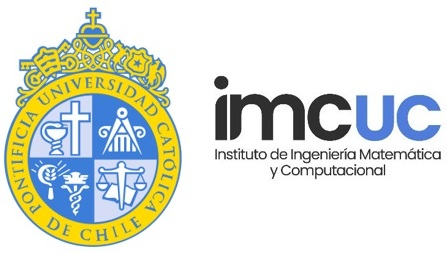  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre:** 2024-2<br>
**Profesor:** Rodrigo A. Carrasco <br>

# <h1><center>Interrogación 1</center></h1>

## Instrucciones

* Esta parte de la Interrogación debe ser desarrollada completamente en lenguaje de programación Python en este Notebook de Jupyter.

* El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados, y siguiendo buenas prácticas de programación. <br>
* La entrega de la interrogación se realizará a través de Canvas en la actividad `I1 Desarrollo`.
* Esta Interrogación debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.
* Está **estrictamente prohibido comunicarse con sus compañeros de curso o terceras personas** durante el desarrollo de esta interrogación.
* Puede consultar los apuntes del curso de todo tipo.
* Habrá sólo dos instancias para hacer preguntas, una al inicio de la prueba y otra a los 30 minutos de avance.<br>


* Ud. dispone de 1 hora para desarrollar esta interrogación.
* Recuerde **guardar frecuentemente sus avances** para evitar pérdidas de trabajo o problemas de envío.<br>

*** 
## Parte 2: Trabajo de Desarrollo (60 min)

Esta parte de la Interrogación es un trabajo práctico con datos. En esta parte, cada pregunta debe ser respondida desarrollando un código por usted que le permita entregar una respuesta. **No se evaluarán respuestas sin código**.

## 1. Análisis de Datos de la Filarmónica de NY

Siga los siguientes pasos y luego conteste las preguntas usando los datos disponibles en el repositorio de la Filarmónica de Nueva York.

### (*2 pts*) 1.1 Extraer datos de la red

Como vimos en clases, la Filarmónica de NY tiene un repositorio en GitHub donde está la información de todos sus conciertos. Imagine que alguien le entrega la dirección URL donde está el archivo JSON con todos los conciertos y lo almacena en la variable `data_url`

En la siguiente celda escriba un código que baje a su computador el archivo que se encuentra disponible en el URL almacenado en la variable `data_url`, y lo almacene en su computador bajo el nombre `conciertos.json`. Sólo escriba el código y no lo corra, pues no tiene el URL correspondiente.

In [ ]:
respuesta = requests.get(data_url, stream=False)
open('conciertos.json', 'wb').write(respuesta.content)

### 1.2 Lectura y revisión de datos

#### (*10 pt*) 1.2.1 Lectura del archivo local y construcción del DataFrame

En la siguientes celdas (puede agregar celdas si lo necesita) escriba un código que lea el archivo `filarmonica.json` que debió bajar a su computador antes de la prueba y lo deje en un DataFrame de pandas. 

Para ello primero cargue el archivo `json`, explore los índices que tiene, y seleccione el adecuado para tener la información de cada programa intepretado por la filarmónica. 

Luego, usando los métodos de aplanamiento (`json_normalize`) arme un único DataFrame, llamado `nyphil_df` que tenga las siguientes columnas:

`[ID, composerName, workTitle, conductorName, movement, interval, programID, season, eventType, Location, Venue, Date, Time]`

In [1]:
import pandas as pd
import json

# leemos los datos
datos_raw = json.load(open('data_2024\\filarmonica.json','r', encoding='UTF-8'))

In [2]:
datos_raw

{'programs': [{'id': '00646b9f-fec7-4ffb-9fb1-faae410bd9dc-0.1',
   'programID': '3853',
   'orchestra': 'New York Philharmonic',
   'season': '1842-43',
   'concerts': [{'eventType': 'Subscription Season',
     'Location': 'Manhattan, NY',
     'Venue': 'Apollo Rooms',
     'Date': '1842-12-07T05:00:00Z',
     'Time': '8:00PM'}],
   'works': [{'ID': '52446*',
     'composerName': 'Beethoven,  Ludwig  van',
     'workTitle': 'SYMPHONY NO. 5 IN C MINOR, OP.67',
     'conductorName': 'Hill, Ureli Corelli',
     'soloists': []},
    {'ID': '8834*4',
     'composerName': 'Weber,  Carl  Maria Von',
     'workTitle': 'OBERON',
     'movement': '"Ozean, du Ungeheuer" (Ocean, thou mighty monster), Reiza (Scene and Aria), Act II',
     'conductorName': 'Timm, Henry C.',
     'soloists': [{'soloistName': 'Otto, Antoinette',
       'soloistInstrument': 'Soprano',
       'soloistRoles': 'S'}]},
    {'ID': '3642*',
     'composerName': 'Hummel,  Johann',
     'workTitle': 'QUINTET, PIANO, D MINOR, 

In [3]:
# vemos los datos por programa
nycphilraw = pd.json_normalize(datos_raw['programs'])
nycphilraw.head()

,id,programID,orchestra,season,concerts,works
0,00646b9f-fec7-4ffb-9fb1-faae410bd9dc-0.1,3853,New York Philharmonic,1842-43,"[{'eventType': 'Subscription Season', 'Locatio...","[{'ID': '52446*', 'composerName': 'Beethoven, ..."
1,1118e84e-eb59-46cc-9119-d903375e65e6-0.1,5178,New York Philharmonic,1842-43,"[{'eventType': 'Subscription Season', 'Locatio...","[{'ID': '52437*', 'composerName': 'Beethoven, ..."
2,08536612-27c3-437e-9b44-def21034b06c-0.1,10785,Musicians from the New York Philharmonic,1842-43,"[{'eventType': 'Special', 'Location': 'Manhatt...","[{'ID': '52364*1', 'composerName': 'Beethoven,..."
3,81a3b8de-1737-4c9e-9318-b839f7c7c4c0-0.1,5887,New York Philharmonic,1842-43,"[{'eventType': 'Subscription Season', 'Locatio...","[{'ID': '52434*', 'composerName': 'Beethoven, ..."
4,09581bb7-8855-4965-b302-fc54cc669041-0.1,305,New York Philharmonic,1843-44,"[{'eventType': 'Subscription Season', 'Locatio...","[{'ID': '52453*', 'composerName': 'Beethoven, ..."


In [4]:
nycphilraw['concerts'][0]

[{'eventType': 'Subscription Season',
  'Location': 'Manhattan, NY',
  'Venue': 'Apollo Rooms',
  'Date': '1842-12-07T05:00:00Z',
  'Time': '8:00PM'}]

In [5]:
# aplanamos el DataFrame por compositor y luego filtramos los de Richard Wagner
nycphil_concerts = pd.json_normalize(datos_raw["programs"], "concerts", ["programID", "season"])
nycphil_concerts.head()

,eventType,Location,Venue,Date,Time,programID,season
0,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00Z,8:00PM,3853,1842-43
1,Subscription Season,"Manhattan, NY",Apollo Rooms,1843-02-18T05:00:00Z,8:00PM,5178,1842-43
2,Special,"Manhattan, NY",Apollo Rooms,1843-04-07T05:00:00Z,8:00PM,10785,1842-43
3,Subscription Season,"Manhattan, NY",Apollo Rooms,1843-04-22T05:00:00Z,8:00PM,5887,1842-43
4,Subscription Season,"Manhattan, NY",Apollo Rooms,1843-11-18T05:00:00Z,None,305,1843-44


In [6]:
nycphil_works = pd.json_normalize(datos_raw["programs"], "works", ["programID"])
nycphil_works = nycphil_works[['ID', 'composerName', 'workTitle', 'conductorName', 'movement', 'interval', 'programID']]
nycphil_works.head()

,ID,composerName,workTitle,conductorName,movement,interval,programID
0,52446*,"Beethoven, Ludwig van","SYMPHONY NO. 5 IN C MINOR, OP.67","Hill, Ureli Corelli",NaN,NaN,3853
1,8834*4,"Weber, Carl Maria Von",OBERON,"Timm, Henry C.","""Ozean, du Ungeheuer"" (Ocean, thou mighty mons...",NaN,3853
2,3642*,"Hummel, Johann","QUINTET, PIANO, D MINOR, OP. 74",NaN,NaN,NaN,3853
3,0*,NaN,NaN,NaN,NaN,Intermission,3853
4,8834*3,"Weber, Carl Maria Von",OBERON,"Etienne, Denis G.",Overture,NaN,3853


In [7]:
nyphil_df = pd.merge(nycphil_works, nycphil_concerts, on='programID')
nyphil_df.head()

,ID,composerName,workTitle,conductorName,movement,interval,programID,eventType,Location,Venue,Date,Time,season
0,52446*,"Beethoven, Ludwig van","SYMPHONY NO. 5 IN C MINOR, OP.67","Hill, Ureli Corelli",NaN,NaN,3853,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00Z,8:00PM,1842-43
1,8834*4,"Weber, Carl Maria Von",OBERON,"Timm, Henry C.","""Ozean, du Ungeheuer"" (Ocean, thou mighty mons...",NaN,3853,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00Z,8:00PM,1842-43
2,3642*,"Hummel, Johann","QUINTET, PIANO, D MINOR, OP. 74",NaN,NaN,NaN,3853,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00Z,8:00PM,1842-43
3,0*,NaN,NaN,NaN,NaN,Intermission,3853,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00Z,8:00PM,1842-43
4,8834*3,"Weber, Carl Maria Von",OBERON,"Etienne, Denis G.",Overture,NaN,3853,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00Z,8:00PM,1842-43


#### (*2 pt*) 1.2.2 Muestre 7 filas de datos al azar de su DataFrame

Respuesta:

In [8]:
# pregunta 1.2.2
nyphil_df.sample(7)

,ID,composerName,workTitle,conductorName,movement,interval,programID,eventType,Location,Venue,Date,Time,season
8942,50620*,"Wagner, Richard","SIEGFRIED IDYLL, WWV 103","Stransky, Josef",NaN,NaN,3717,Tour,"Springfield, MA",Court Square Theater,1911-11-08T05:00:00Z,8:15PM,1911-12
126622,51642*,"Mozart, Wolfgang Amadeus","SYMPHONY NO. 35, D MAJOR, K.385, ""HAFFNER""","Glover, Jane",NaN,NaN,14831,Subscription Season,"Manhattan, NY",David Geffen Hall,2024-05-08T04:00:00Z,7:30PM,2023-24
38851,53052*,"Lyadov, Anatoli","RUSSIAN FOLK SONGS, EIGHT, OP. 58","Smallens, Alexander",NaN,NaN,11847,Stadium Concert,"Manhattan, NY",Lewisohn Stadium,1939-07-28T04:00:00Z,8:30PM,1938-39
76765,13240*,"Gabrieli, Giovanni","CANZON PER SONAR DUODECIMI TONI, CH. 174","Ceccato, Aldo",NaN,NaN,206,Subscription Season,"Manhattan, NY",Avery Fisher Hall,1974-04-12T04:00:00Z,2:00PM,1973-74
67915,6468*,"Schuman, William",PHILHARMONIC FANFARE,"Steinberg, William",NaN,NaN,1159,Parks,"Bronx, NY",NY Botanical Garden,1965-08-14T04:00:00Z,5:30PM,1964-65
124737,0*,NaN,NaN,NaN,NaN,Intermission,14619,Parks,"Manhattan, NY","The Great Lawn, Central Park",2022-06-15T04:00:00Z,8:00PM,2021-22
8618,50317*2,"Elgar, Sir Edward","SEA PICTURES, OP. 37","Mahler, Gustav",In Haven (Capri),NaN,5648,Subscription Season,"Manhattan, NY",Carnegie Hall,1911-02-17T05:00:00Z,2:30PM,1910-11


#### (*2 pts*) 1.2.3 Imprima una lista de los tipos de datos que tiene en cada columna.

Respuesta:

In [9]:
# pregunta 1.2.3
nyphil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126756 entries, 0 to 126755
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ID             126756 non-null  object
 1   composerName   108085 non-null  object
 2   workTitle      108073 non-null  object
 3   conductorName  100288 non-null  object
 4   movement       35253 non-null   object
 5   interval       18670 non-null   object
 6   programID      126756 non-null  object
 7   eventType      126756 non-null  object
 8   Location       126756 non-null  object
 9   Venue          126756 non-null  object
 10  Date           126756 non-null  object
 11  Time           126756 non-null  object
 12  season         126756 non-null  object
dtypes: object(13)
memory usage: 12.6+ MB


#### (*2 pts*) 1.2.4 Conteste:

Su base ahora cuenta con un listado de los compositores interpretados en cada concierto que ha hecho la filarmónica. ¿Cuál es el total de combinaciones concierto/compositor que tiene su base?

Respuesta:

In [10]:
# pregunta 1.2.4
len(nyphil_df)

126756

### 1.3 Revisión y limpieza de datos

Usando el DataFrame de pandas de la pregunta anterior realice las siguientes actividades. Puede agregar celdas si lo necesita.

#### (*5 pts*) 1.3.1 Conteste: ¿Estan correctos todos los tipos de datos que asumió Pandas? Si no lo están, justifique por qué y transforme la columna al tipo correcto.

Respuesta:

En este caso vemos que la mayoría de las columnas poseen tipos de datos razonables para la información que existe ahí. 

La excepción son `programID`, `eventType` y `Date` que están como object. 
- `programID` podría estar en `int` dado que todos son números.
- `eventType` tiene un conjunto limitado de opciones, así que podría estar como categoría.
- `Date` debe estar como fecha.

In [11]:
nyphil_df['programID'] = nyphil_df['programID'].astype('int')

In [12]:
nyphil_df['eventType'] = nyphil_df['eventType'].astype('category')
nyphil_df['eventType'].unique()

['Subscription Season', 'Special', 'Chamber', 'Festival', 'Non-Subscription', ..., 'Community', 'NY Phil @ Noon', 'Artist Spotlight', 'Take a Breath', 'Pride Alliance']
Length: 71
Categories (71, object): ['Artist Spotlight', 'Artist in Residence / Soloist Recital', 'Artist in Residence recital', 'Bandwagon', ..., 'World Trade Center - Chamber', 'World's Fair', 'Young People's Concert', 'Young People's Concerts for Schools']

In [13]:
nyphil_df['Date'] = pd.to_datetime(nyphil_df['Date'])

In [14]:
nyphil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126756 entries, 0 to 126755
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   ID             126756 non-null  object             
 1   composerName   108085 non-null  object             
 2   workTitle      108073 non-null  object             
 3   conductorName  100288 non-null  object             
 4   movement       35253 non-null   object             
 5   interval       18670 non-null   object             
 6   programID      126756 non-null  int32              
 7   eventType      126756 non-null  category           
 8   Location       126756 non-null  object             
 9   Venue          126756 non-null  object             
 10  Date           126756 non-null  datetime64[ns, UTC]
 11  Time           126756 non-null  object             
 12  season         126756 non-null  object             
dtypes: category(1), datetime64[ns

#### (*3 pts*) 1.3.2 Conteste: ¿Hay columnas que usted eliminaría del DataFrame? Si hay alguna, indique por qué, y si no hay ninguna, también justifique por qué.

Respuesta:

En este caso las columnas `movement` e `interval` tienen muy pocos datos no nulos, por lo que se podrían eliminar según sean los objetivos del estudio posterior.

#### (*3 pts*) 1.3.3: Escriba un código que elimine las columnas identificadas en el punto anterior. Si usted no identificó columnas a eliminar, escriba en una celda de texto cómo sería el comando para eliminar una columna innecesaria en su DataFrame.

Respuesta:

In [15]:
# pregunta 1.3.3
nyphil_df.drop(columns=['movement', 'interval'], inplace=True)
nyphil_df.head(5)

,ID,composerName,workTitle,conductorName,programID,eventType,Location,Venue,Date,Time,season
0,52446*,"Beethoven, Ludwig van","SYMPHONY NO. 5 IN C MINOR, OP.67","Hill, Ureli Corelli",3853,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07 05:00:00+00:00,8:00PM,1842-43
1,8834*4,"Weber, Carl Maria Von",OBERON,"Timm, Henry C.",3853,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07 05:00:00+00:00,8:00PM,1842-43
2,3642*,"Hummel, Johann","QUINTET, PIANO, D MINOR, OP. 74",NaN,3853,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07 05:00:00+00:00,8:00PM,1842-43
3,0*,NaN,NaN,NaN,3853,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07 05:00:00+00:00,8:00PM,1842-43
4,8834*3,"Weber, Carl Maria Von",OBERON,"Etienne, Denis G.",3853,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07 05:00:00+00:00,8:00PM,1842-43


#### (*5 pts*) 1.3.4: Conteste: ¿Hay datos duplicados en su DataFrame? Escriba un código que los detecte y muestre los registros duplicados si es que los hay.

Respuesta:

In [16]:
# pregunta 1.3.4
duplicados = nyphil_df.duplicated(keep=False)
datos_duplicados = nyphil_df[duplicados]
datos_duplicados

,ID,composerName,workTitle,conductorName,programID,eventType,Location,Venue,Date,Time,season
67,52512*,"Mendelssohn, Felix","HEBRIDES (FINGAL'S CAVE) OVERTURE, OP.26","Loder, George",6310,Subscription Season,"Manhattan, NY",Apollo Rooms,1844-11-16 05:00:00+00:00,8:00PM,1844-45
71,52512*,"Mendelssohn, Felix","HEBRIDES (FINGAL'S CAVE) OVERTURE, OP.26","Loder, George",6310,Subscription Season,"Manhattan, NY",Apollo Rooms,1844-11-16 05:00:00+00:00,8:00PM,1844-45
819,0*,NaN,NaN,NaN,4537,Subscription Season,"Manhattan, NY",Academy of Music,1864-11-05 05:00:00+00:00,8:00PM,1864-65
823,0*,NaN,NaN,NaN,4537,Subscription Season,"Manhattan, NY",Academy of Music,1864-11-05 05:00:00+00:00,8:00PM,1864-65
879,0*,NaN,NaN,NaN,6144,Subscription Season,"Manhattan, NY",Academy of Music,1866-01-27 05:00:00+00:00,8:00PM,1865-66
...,...,...,...,...,...,...,...,...,...,...,...
115967,2331*7,"Rimsky-Korsakov, Nikolai","SCHEHERAZADE, OP. 35","Scaglione, Case",11943,Young People's Concerts for Schools,"Manhattan, NY",Avery Fisher Hall,2013-05-23 04:00:00+00:00,10:30AM,2012-13
121556,8742*1,"Sondheim, Stephen",COMPANY (ARR. Tunick),"Einhorn, Andy",14112,Pension Fund Benefit Concert,"Manhattan, NY",David Geffen Hall,2018-05-01 04:00:00+00:00,7:30PM,2017-18
121559,8742*1,"Sondheim, Stephen",COMPANY (ARR. Tunick),"Einhorn, Andy",14112,Pension Fund Benefit Concert,"Manhattan, NY",David Geffen Hall,2018-05-01 04:00:00+00:00,7:30PM,2017-18
124985,6979*,"Debussy, Claude",SYRINX,NaN,14783,Chamber,"Manhattan, NY","Theresa L. Kaufmann Concert Hall, 92nd St. YMHA",2022-11-20 05:00:00+00:00,3:00PM,2022-23


#### (*3 pts*) 1.3.5: Escriba un código que elimine las filas duplicadas, si es que las hubiera, dejando el perimer registro del DataFrame si hay duplicados.

Respuesta:

In [17]:
# pregunta 1.3.5
nyphil_df_limpio = nyphil_df.drop_duplicates(keep='first')
nyphil_df_limpio

,ID,composerName,workTitle,conductorName,programID,eventType,Location,Venue,Date,Time,season
0,52446*,"Beethoven, Ludwig van","SYMPHONY NO. 5 IN C MINOR, OP.67","Hill, Ureli Corelli",3853,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07 05:00:00+00:00,8:00PM,1842-43
1,8834*4,"Weber, Carl Maria Von",OBERON,"Timm, Henry C.",3853,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07 05:00:00+00:00,8:00PM,1842-43
2,3642*,"Hummel, Johann","QUINTET, PIANO, D MINOR, OP. 74",NaN,3853,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07 05:00:00+00:00,8:00PM,1842-43
3,0*,NaN,NaN,NaN,3853,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07 05:00:00+00:00,8:00PM,1842-43
4,8834*3,"Weber, Carl Maria Von",OBERON,"Etienne, Denis G.",3853,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07 05:00:00+00:00,8:00PM,1842-43
...,...,...,...,...,...,...,...,...,...,...,...
126751,1807*6,"Prokofiev, Sergei","QUINTET FOR OB/CL/VLN/VLA/CB, OP. 39, G MINOR",NaN,15035,Parks - Free Indoor Concert,"Staten Island, NY",St. George Theatre,2024-06-16 04:00:00+00:00,4:00PM,2023-24
126752,51664*,"Mozart, Wolfgang Amadeus","SYMPHONY NO. 40, G MINOR, K.550","van Zweden, Jaap",15005,Tour,"Guangzhou, CHINA",Guangzhou Opera House,2024-06-27 04:00:00+00:00,7:30PM,2023-24
126753,0*,NaN,NaN,NaN,15005,Tour,"Guangzhou, CHINA",Guangzhou Opera House,2024-06-27 04:00:00+00:00,7:30PM,2023-24
126754,52390*,"Copland, Aaron",SYMPHONY NO. 3,"van Zweden, Jaap",15005,Tour,"Guangzhou, CHINA",Guangzhou Opera House,2024-06-27 04:00:00+00:00,7:30PM,2023-24


#### (*5 pts*) 1.3.6: La columna `eventType	` tiene todas las condiciones para ser una columna de datos categóricos. Explique por qué podrían ser datos categóricos y transforme esa columna en variables categóricas.

Respuesta:

Esta columna tiene datos cuyos valores están limitados a pocos posibles valores. Esto es justo lo que se necesita para el caso de variables categóricas.

In [18]:
# pregunta 1.3.6
nyphil_df_limpio['eventType'] = nyphil_df_limpio['eventType'].astype('category')

C:\Users\rodri\AppData\Local\Temp\ipykernel_20328\2034492340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyphil_df_limpio['eventType'] = nyphil_df_limpio['eventType'].astype('category')


In [19]:
nyphil_df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126218 entries, 0 to 126755
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   ID             126218 non-null  object             
 1   composerName   107658 non-null  object             
 2   workTitle      107646 non-null  object             
 3   conductorName  99874 non-null   object             
 4   programID      126218 non-null  int32              
 5   eventType      126218 non-null  category           
 6   Location       126218 non-null  object             
 7   Venue          126218 non-null  object             
 8   Date           126218 non-null  datetime64[ns, UTC]
 9   Time           126218 non-null  object             
 10  season         126218 non-null  object             
dtypes: category(1), datetime64[ns, UTC](1), int32(1), object(8)
memory usage: 10.2+ MB


### 1.4 Análisis de datos

En la pregunta anterior hicimos algunos elementos básicos de limpieza. Usando el DataFrame limpio resultante final de la pregunta 1.3, conteste las siguientes preguntas. Puede agregar celdas si lo necesita.

#### (*7 pts*) 1.4.1 ¿Cuáles son los 20 compositores más tocados por la filarmónica? Imprima el nombre de los compositores.

Respuesta:

In [20]:
composers = nyphil_df_limpio['composerName'].value_counts()
composers.head(20)

composerName
Beethoven,  Ludwig  van        6698
Wagner,  Richard               6291
Tchaikovsky,  Pyotr  Ilyich    5011
Mozart,  Wolfgang  Amadeus     4522
Brahms,  Johannes              3812
Strauss,  Richard              2520
Bach,  Johann  Sebastian       2217
Prokofiev,  Sergei             2111
Berlioz,  Hector               2102
Mendelssohn,  Felix            2076
Handel,  George  Frideric      2044
Dvorak,  Antonín               1899
Stravinsky,  Igor              1840
Ravel,  Maurice                1778
Schubert,  Franz               1750
Debussy,  Claude               1717
Schumann,  Robert              1462
Gershwin,  George              1458
Haydn,  Franz  Joseph          1435
Liszt,  Franz                  1320
Name: count, dtype: int64

#### (*5 pts*) 1.4.2 ¿Cuáles son los 15 lugares más comunes donde ha tocado la Filarmónica? ¿Hacen sentido estos resultados? Explique por qué.

Respuesta:

In [21]:
locations = nyphil_df_limpio['Location'].value_counts()
locations.head(15)

Location
Manhattan, NY        106138
Brooklyn, NY           1973
Philadelphia, PA       1348
Vail, CO                862
Bronx, NY               594
Queens, NY              560
Washington, DC          528
Staten Island, NY       402
Greenvale, NY           389
Baltimore, MD           350
Tokyo, JAPAN            303
London, ENGLAND         254
Newark, NJ              240
Holmdel, NJ             214
Princeton, NJ           203
Name: count, dtype: int64

#### (*7 pts*) 1.4.3 ¿Cuáles son los tipos de evento más comunes? (el tipo de evento está en la columna `eventType`).

Respuesta:

In [22]:
eventType = nyphil_df_limpio['eventType'].value_counts()
eventType.head(15)

eventType
Subscription Season                    66415
Stadium Concert                        13397
Tour                                   13028
Young People's Concert                  5967
Promenade                               3473
Parks                                   2637
Special                                 2479
Chamber                                 2421
Student Concert                         2148
Runout                                  1600
Festival                                1306
Non-Subscription                        1247
Pension Fund Benefit Concert            1146
Young People's Concerts for Schools      834
Summertime Classics                      811
Name: count, dtype: int64

#### (*5 pts*) 1.4.4 Usando los datos anteriores, arme un nuevo DataFrame que contenga sólo conciertos hechos en el lugar con más conciertos, con el tipo de evento más común, y con el compositor más tocado por la filarmónica.

Respuesta:

In [23]:
nyphil_selec = nyphil_df_limpio[(nyphil_df_limpio['composerName']==composers.keys()[0]) & (nyphil_df_limpio['Location']==locations.keys()[0]) & (nyphil_df_limpio['eventType']==eventType.keys()[0])]
nyphil_selec

,ID,composerName,workTitle,conductorName,programID,eventType,Location,Venue,Date,Time,season
0,52446*,"Beethoven, Ludwig van","SYMPHONY NO. 5 IN C MINOR, OP.67","Hill, Ureli Corelli",3853,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07 05:00:00+00:00,8:00PM,1842-43
6,8837*6,"Beethoven, Ludwig van","FIDELIO, OP. 72","Timm, Henry C.",3853,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07 05:00:00+00:00,8:00PM,1842-43
9,52437*,"Beethoven, Ludwig van","SYMPHONY NO. 3 IN E FLAT MAJOR, OP. 55 (EROICA)","Hill, Ureli Corelli",5178,Subscription Season,"Manhattan, NY",Apollo Rooms,1843-02-18 05:00:00+00:00,8:00PM,1842-43
30,52434*,"Beethoven, Ludwig van","SYMPHONY NO. 2 IN D MAJOR, OP.36","Boucher, Alfred",5887,Subscription Season,"Manhattan, NY",Apollo Rooms,1843-04-22 05:00:00+00:00,8:00PM,1842-43
34,52425*,"Beethoven, Ludwig van","SEPTET, E-FLAT MAJOR, OP.20",NaN,5887,Subscription Season,"Manhattan, NY",Apollo Rooms,1843-04-22 05:00:00+00:00,8:00PM,1842-43
...,...,...,...,...,...,...,...,...,...,...,...
126456,52446*,"Beethoven, Ludwig van","SYMPHONY NO. 5 IN C MINOR, OP.67","van Zweden, Jaap",14820,Subscription Season,"Manhattan, NY",David Geffen Hall,2024-03-16 04:00:00+00:00,8:00PM,2023-24
126473,52446*,"Beethoven, Ludwig van","SYMPHONY NO. 5 IN C MINOR, OP.67","van Zweden, Jaap",15001,Subscription Season,"Manhattan, NY",David Geffen Hall,2024-03-19 04:00:00+00:00,7:30PM,2023-24
126625,1855*,"Beethoven, Ludwig van","AH! PERFIDO, OP.65","Glover, Jane",14831,Subscription Season,"Manhattan, NY",David Geffen Hall,2024-05-08 04:00:00+00:00,7:30PM,2023-24
126626,1855*,"Beethoven, Ludwig van","AH! PERFIDO, OP.65","Glover, Jane",14831,Subscription Season,"Manhattan, NY",David Geffen Hall,2024-05-09 04:00:00+00:00,7:30PM,2023-24


#### (*3 pts*) 1.4.5 Considerando su nuevo DataFrame, ¿cuál es el conductor qué más ha dirigido la Filarmónica en este subconjunto?

Respuesta:

In [24]:
conductors = nyphil_selec['conductorName'].value_counts()
conductors.head(15)

conductorName
Damrosch, Walter        440
Stransky, Josef         207
Bernstein, Leonard      192
Masur, Kurt             185
Walter, Bruno           171
Szell, George           170
Toscanini, Arturo       158
Mitropoulos, Dimitri    154
Mehta, Zubin            133
Barbirolli , John       118
Mengelberg, Willem      110
Maazel, Lorin           105
Rodzinski, Artur         82
Leinsdorf, Erich         81
Bergmann, Carl           75
Name: count, dtype: int64

#### (*6 pts*) 1.4.6 Considerando su nuevo DataFrame ¿hay algún cambio en el número de obras tocadas por este compositor más importante a lo largo del tiempo? 

Para contestar esta pregunta realice un gráfico que muestre la cantidad de interpretaciones de este compositor para cada temporada. No olvide poner título al gráfico y a los ejes, y comentar lo que infiere usted al ver el gráfico.

Respuesta:

In [25]:
cantidad = nyphil_selec['season'].value_counts()
cantidad.head(15)

season
1923-24    107
1953-54     70
1920-21     68
1959-60     59
1948-49     59
1907-08     58
1933-34     56
1921-22     52
1926-27     52
1931-32     50
1962-63     49
1998-99     47
1925-26     46
1947-48     45
1913-14     45
Name: count, dtype: int64

Text(0.5, 1.0, 'Conciertos por temporada')

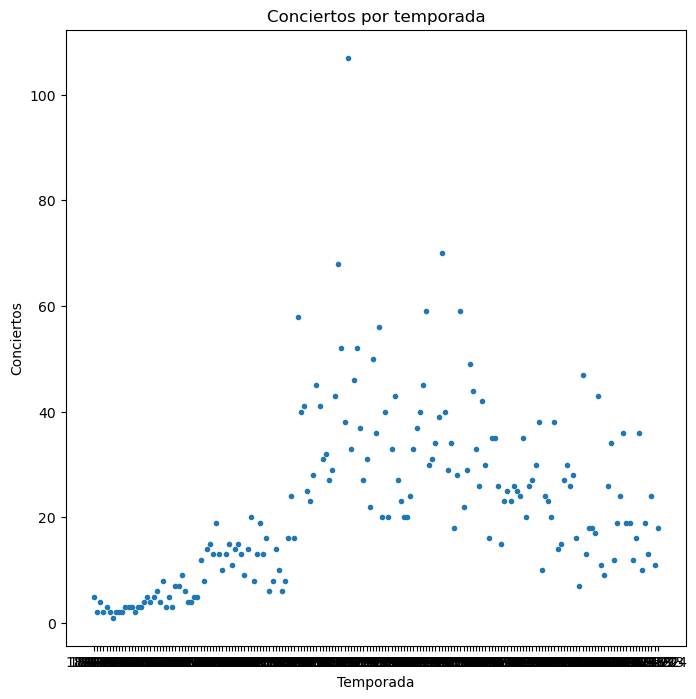

In [26]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.plot(sorted(cantidad.keys()), cantidad[sorted(cantidad.keys())],'.')
ax.set_xlabel('Temporada')
ax.set_ylabel('Conciertos')
ax.set_title('Conciertos por temporada')